In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
custs = pd.read_csv("Customer.csv")
trans = pd.read_csv("Transactions.csv")
prod_cat_info = pd.read_csv("prod_cat_info.csv")

In [3]:
custs.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [4]:
trans.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [5]:
prod_cat_info.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [6]:
# Merge Transaction + Product (on prod_subcat_code)
df_tr_prod = trans.merge(prod_cat_info, left_on="prod_subcat_code", right_on="prod_sub_cat_code", how='left')

# Merge with Customer (inner join → only customers who transacted)
Customer_Final = df_tr_prod.merge(custs, left_on="cust_id", right_on="customer_Id", how='inner')

In [7]:
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,1,Clothing,1,Women,270351,26-09-1981,M,5.0
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,2,Footwear,1,Mens,270351,26-09-1981,M,5.0
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,4,Bags,1,Mens,270351,26-09-1981,M,5.0
3,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,3,Electronics,5,Computers,270384,11-05-1973,F,8.0
4,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,27-07-1992,M,8.0


In [8]:
Customer_Final.shape

(57166, 18)

### 2. Prepare a summary report for the merged data set.
* a. Get the column names and their corresponding data types
* b. Top/Bottom 10 observations
* c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
* d. Frequency tables for all the categorical variables

In [9]:
# a. Get the column names and their corresponding data types
Customer_Final.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code_x        int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat_code_y        int64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
dtype: object

In [10]:
# b. Top/Bottom 10 observations
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,1,Clothing,1,Women,270351,26-09-1981,M,5.0
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,2,Footwear,1,Mens,270351,26-09-1981,M,5.0
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,4,Bags,1,Mens,270351,26-09-1981,M,5.0
3,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,3,Electronics,5,Computers,270384,11-05-1973,F,8.0
4,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,27-07-1992,M,8.0


In [11]:

# b. Top/Bottom 10 observations
Customer_Final.tail()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
57161,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,6,Home and kitchen,2,Furnishing,271020,20-06-1976,M,8.0
57162,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,5,Books,11,Children,270911,22-05-1970,M,2.0
57163,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,6,Home and kitchen,11,Bath,270911,22-05-1970,M,2.0
57164,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,5,Books,11,Children,271961,15-01-1982,M,1.0
57165,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,6,Home and kitchen,11,Bath,271961,15-01-1982,M,1.0


In [12]:
# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
Customer_Final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,prod_cat_code_y,prod_sub_cat_code,customer_Id,city_code
count,5.716600e+04,57166.000000,57166.000000,57166.000000,57166.000000,57166.000000,57166.000000,57166.000000,57166.000000,57166.000000,57166.000000,57151.000000
mean,5.017556e+10,271015.375101,5.613949,3.462425,2.429766,635.022653,248.967409,2102.084532,3.446314,5.613949,271015.375101,5.496457
std,2.896442e+10,2426.954106,3.701183,1.710811,2.273219,623.390431,187.344788,2516.597510,1.710013,3.701183,2426.954106,2.865186
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000,1.000000,266783.000000,1.000000
25%,2.527880e+10,268931.000000,3.000000,2.000000,1.000000,312.000000,98.490000,764.660000,2.000000,3.000000,268931.000000,3.000000
50%,5.019132e+10,270982.000000,4.000000,3.000000,3.000000,709.000000,199.342500,1759.160000,3.000000,4.000000,270982.000000,5.000000
75%,7.551116e+10,273096.000000,10.000000,5.000000,4.000000,1109.000000,364.980000,3553.680000,5.000000,10.000000,273096.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,6.000000,12.000000,275265.000000,10.000000


In [13]:
# d. Frequency tables for all the categorical variables
cat_cols = Customer_Final.select_dtypes(include=['object']).columns
for c in cat_cols:
    print(Customer_Final.value_counts(c))

tran_date
25-11-2012    90
13-07-2011    89
7/10/2011     86
4/1/2013      85
15-09-2013    85
              ..
28-02-2014     3
24-02-2014     3
23-02-2014     2
21-02-2014     1
27-02-2014     1
Name: count, Length: 1129, dtype: int64
Store_type
e-Shop            23087
MBR               11644
Flagship store    11324
TeleShop          11111
Name: count, dtype: int64
prod_cat
Books               12179
Clothing            10019
Footwear            10019
Electronics          9910
Home and kitchen     8087
Bags                 6952
Name: count, dtype: int64
prod_subcat
Women                  10019
Mens                    9902
Kids                    7069
Mobiles                 4002
Comics                  3067
Audio and video         2993
Non-Fiction             2993
Kitchen                 2993
Children                2058
Bath                    2058
Academic                2029
Tools                   2029
Fiction                 1043
Furnishing              1007
DIY                  

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.


In [14]:
# continuous columns
cont_cols = Customer_Final.select_dtypes(include=np.number).columns

In [15]:
cont_cols

Index(['transaction_id', 'cust_id', 'prod_subcat_code', 'prod_cat_code_x',
       'Qty', 'Rate', 'Tax', 'total_amt', 'prod_cat_code_y',
       'prod_sub_cat_code', 'customer_Id', 'city_code'],
      dtype='object')

In [16]:
# histograms for continuous columns

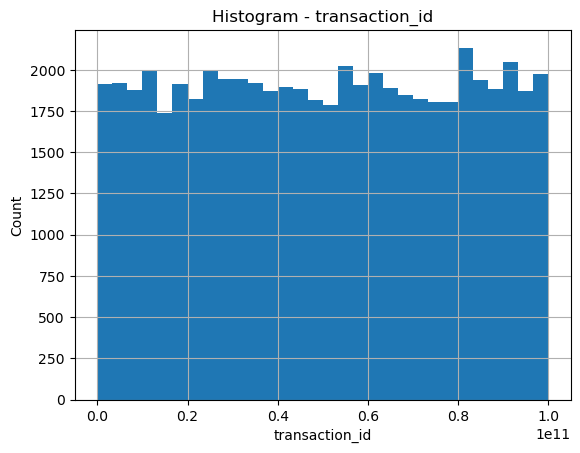

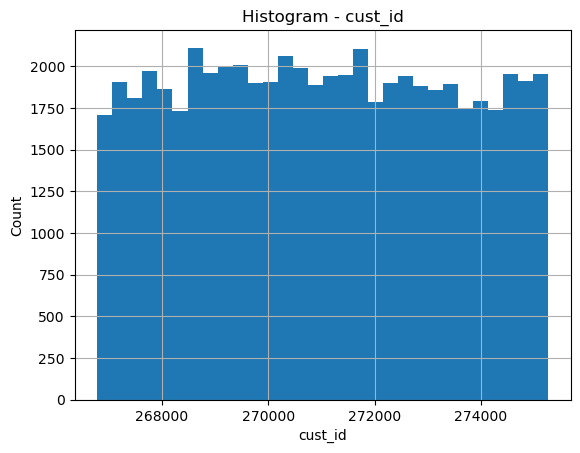

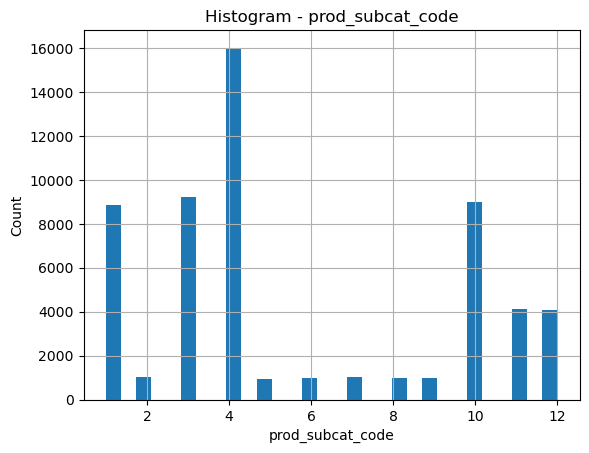

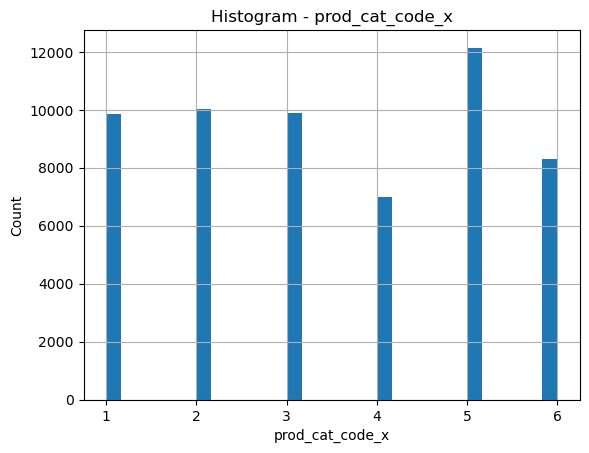

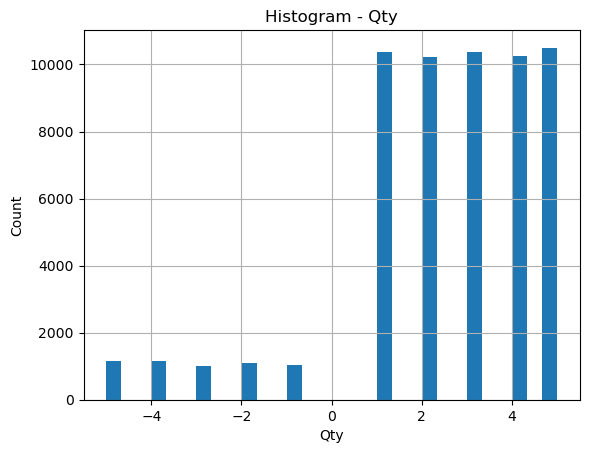

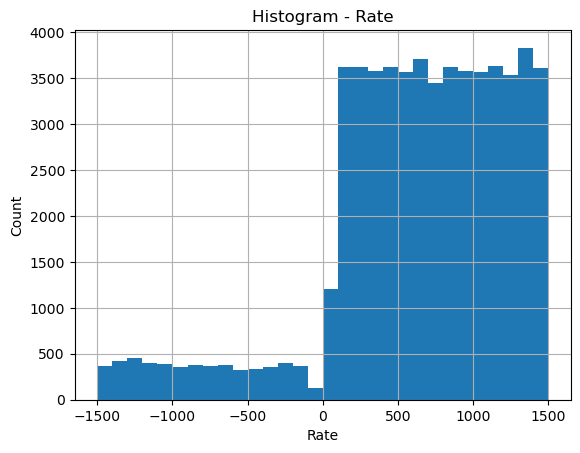

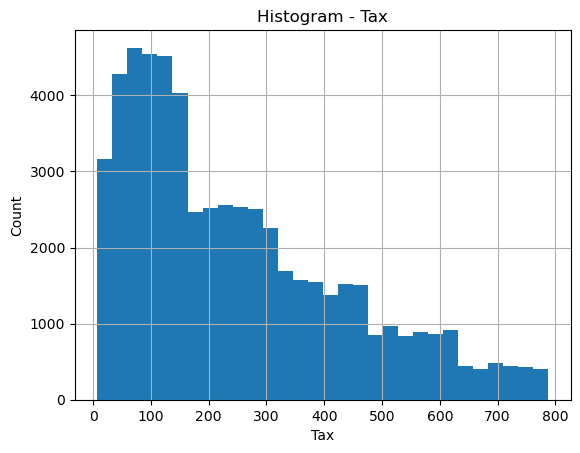

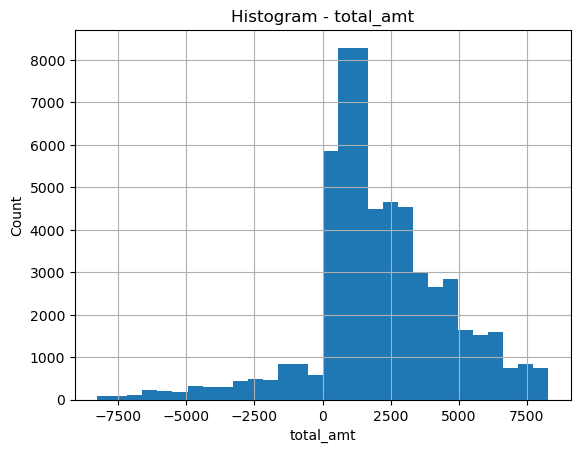

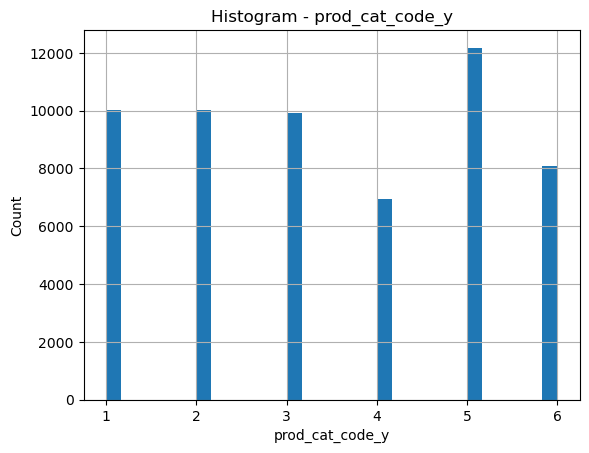

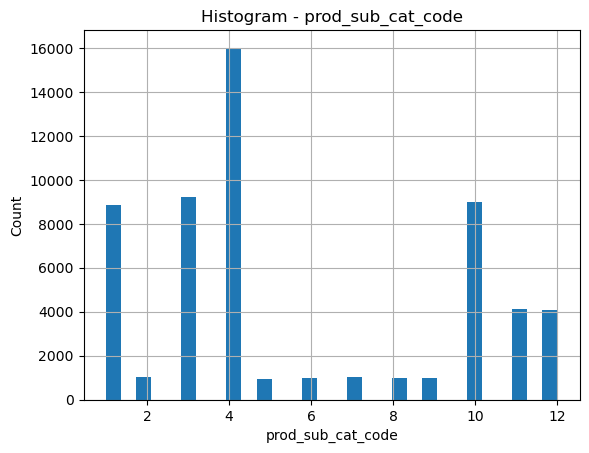

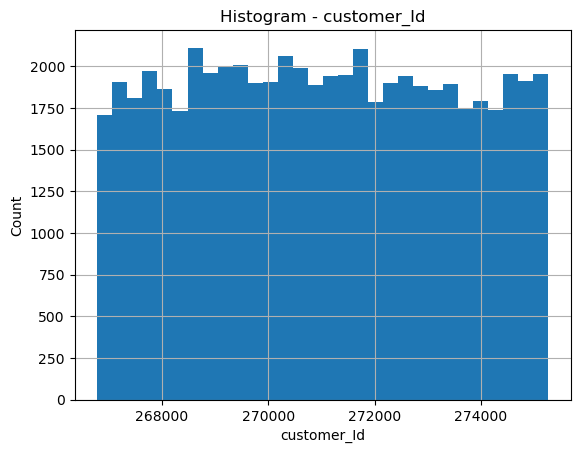

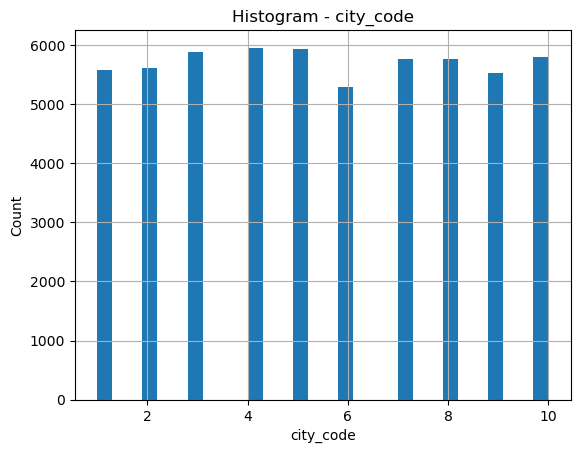

In [17]:
for c in cont_cols:
    Customer_Final[c].hist(bins=30)
    plt.title(f"Histogram - {c}")
    plt.ylabel("Count")
    plt.xlabel(c)
    plt.show()            # without plt.show() not possible to show all looping chart so necessarily use plt.show()

    

In [18]:
# categorical columns
cat_cols = Customer_Final.select_dtypes(include=["object"]).columns

In [19]:
cat_cols

Index(['tran_date', 'Store_type', 'prod_cat', 'prod_subcat', 'DOB', 'Gender'], dtype='object')

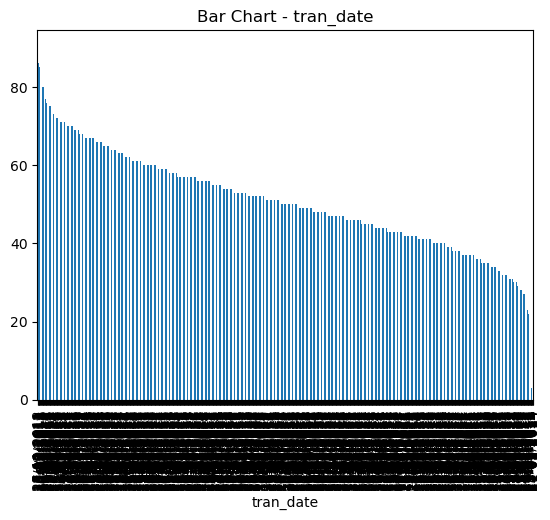

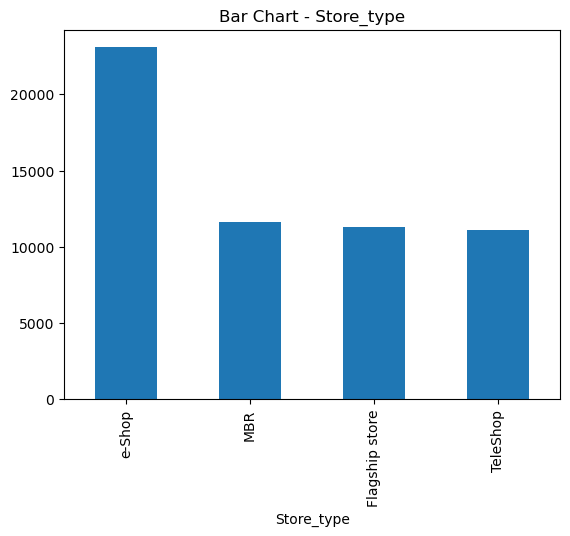

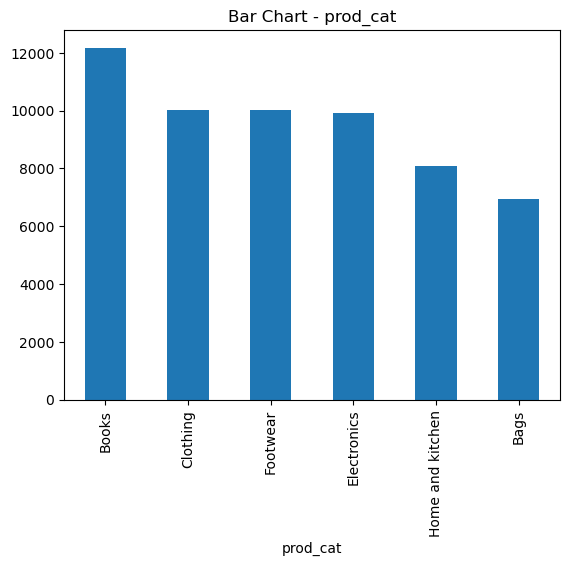

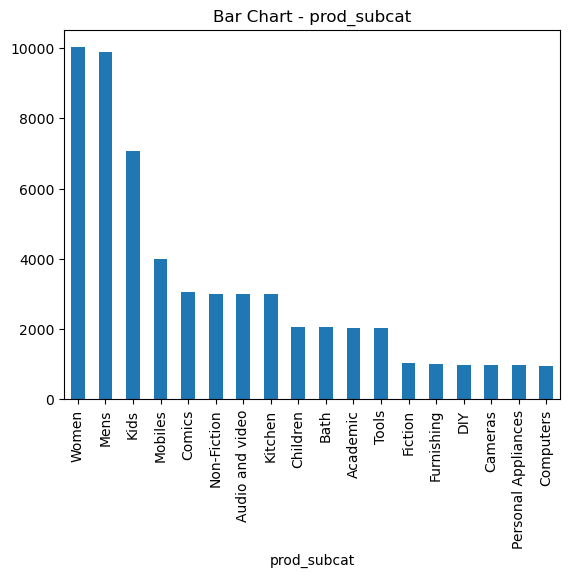

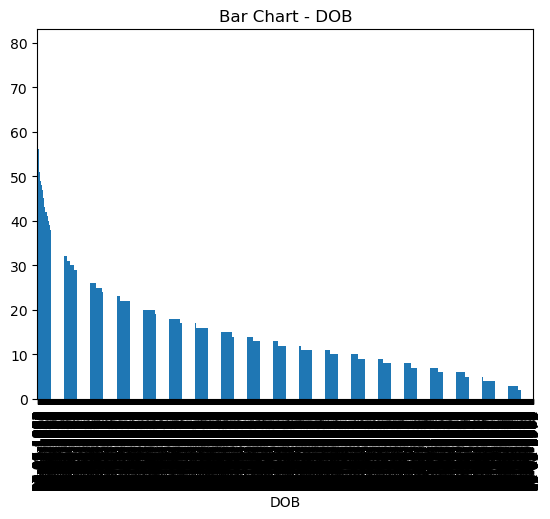

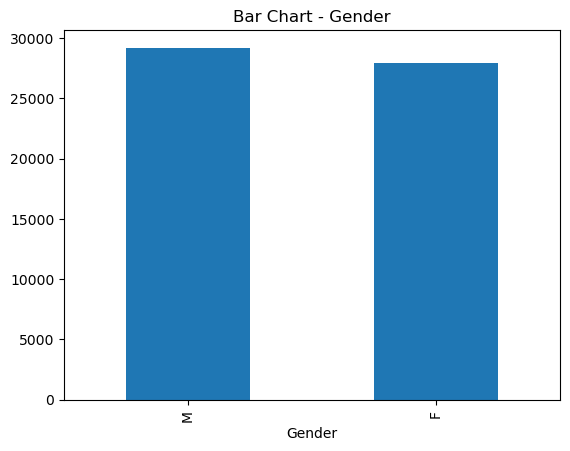

In [20]:
# frequency bar for categorical columns
for c in cat_cols:
    Customer_Final[c].value_counts().plot(kind="bar")
    plt.title(f"Bar Chart - {c}")
    plt.show()

### 4. Calculate the following information using the merged dataset :
* a. Time period of the available transaction data
* b. Count of transactions where the total amount of transaction was negative

In [21]:
# a. Time period of the available transaction data
max_tp = pd.to_datetime(Customer_Final["tran_date"].max())
min_tp = pd.to_datetime(Customer_Final["tran_date"].min())
print(f"Time Period for available transaction is {min_tp} to {max_tp}")

Time Period for available transaction is 2012-01-01 00:00:00 to 2013-09-09 00:00:00


In [22]:
# b. Count of transactions where the total amount of transaction was negative
neg_trans = Customer_Final[Customer_Final["total_amt"] < 0].shape[0]
print(f"Count of transactions where the total amount of transaction was negative : {neg_trans}")

Count of transactions where the total amount of transaction was negative : 5430


### 5. Analyze which product categories are more popular among females vs male customers.


In [23]:
# more popular category for male vs female
Customer_Final.groupby(["prod_cat","Gender"])["transaction_id"].count().sort_values(ascending=False).head()

prod_cat     Gender
Books        M         6169
             F         6004
Electronics  M         5113
Clothing     M         5099
Footwear     M         5099
Name: transaction_id, dtype: int64

In [24]:
# more popular category for male 
Customer_Final[Customer_Final.loc[:,"Gender"]=="M"].groupby(["prod_cat","Gender"])["transaction_id"].count().sort_values(ascending=False).head(1)

prod_cat  Gender
Books     M         6169
Name: transaction_id, dtype: int64

In [25]:
# more popular category for female
Customer_Final[Customer_Final.loc[:,"Gender"]=="F"].groupby(["prod_cat","Gender"])["transaction_id"].count().sort_values(ascending=False).head(1)

prod_cat  Gender
Books     F         6004
Name: transaction_id, dtype: int64

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [26]:
city_code_w_max_cust = Customer_Final.groupby(["city_code"])["cust_id"].nunique().sort_values(ascending=False).head(1)
city_code_w_max_cust

city_code
3.0    576
Name: cust_id, dtype: int64

In [27]:
tot_custs = Customer_Final["cust_id"].nunique()
tot_custs

5506

In [28]:
per_of_custs = (city_code_w_max_cust/tot_custs)*100
per_of_custs

city_code
3.0    10.461315
Name: cust_id, dtype: float64

### 7. Which store type sells the maximum products by value and by quantity?


In [29]:
# store type sells the maximum products by value
Customer_Final.groupby(["Store_type"])["total_amt"].sum().sort_values(ascending=False).head(1)

Store_type
e-Shop    49096588.71
Name: total_amt, dtype: float64

In [30]:
# store type sells the maximum products by quantity
Customer_Final.groupby(["Store_type"])["Qty"].sum().sort_values(ascending=False).head(1)

Store_type
e-Shop    56372
Name: Qty, dtype: int64

In [31]:
Customer_Final.groupby(["Store_type"]).agg(Total_Sales = ("total_amt","sum"),Total_Qty = ("Qty","sum"))

,Total_Sales,Total_Qty
Store_type,,
Flagship store,24072659.26,27600
MBR,24018167.29,27869
TeleShop,22980349.08,27059
e-Shop,49096588.71,56372


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [32]:
Customer_Final[(Customer_Final["Store_type"] =='Flagship store') & (Customer_Final["prod_cat"].isin(["Electronics", "Clothing"]))].head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
30,25963520987,274829,20-02-2014,4,4,3,502,158.130,1664.130,Flagship store,1,Clothing,4,Mens,274829,05-09-1984,F,2.0
32,25963520987,274829,20-02-2014,4,4,3,502,158.130,1664.130,Flagship store,3,Electronics,4,Mobiles,274829,05-09-1984,F,2.0
61,99581788104,267466,20-02-2014,3,2,1,96,10.080,106.080,Flagship store,1,Clothing,3,Kids,267466,06-08-1987,F,7.0
91,63407734630,271322,19-02-2014,3,2,5,1360,714.000,7514.000,Flagship store,1,Clothing,3,Kids,271322,27-11-1979,F,7.0
98,82750983847,267544,19-02-2014,3,5,1,805,84.525,889.525,Flagship store,1,Clothing,3,Kids,267544,12-10-1984,M,7.0


In [33]:
Customer_Final[(Customer_Final["Store_type"] =='Flagship store') & (Customer_Final["prod_cat"].isin(["Electronics", "Clothing"]))].groupby(["Store_type","prod_cat"])["total_amt"].sum()

Store_type      prod_cat   
Flagship store  Clothing       4177586.205
                Electronics    4349256.795
Name: total_amt, dtype: float64

In [34]:
print(f"The total amount earned from the Electronics and Clothing categories from Flagship Stores : {Customer_Final[(Customer_Final["Store_type"] =='Flagship store') & (Customer_Final["prod_cat"].isin(["Electronics", "Clothing"]))].groupby(["Store_type","prod_cat"])["total_amt"].sum().sum()}")

The total amount earned from the Electronics and Clothing categories from Flagship Stores : 8526843.0


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?


In [35]:

Customer_Final[(Customer_Final["Gender"]=="M") & (Customer_Final["prod_cat"]=="Electronics")].head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
54,66989395597,272785,20-02-2014,10,3,2,474,99.54,1047.54,TeleShop,3,Electronics,10,Audio and video,272785,03-09-1979,M,7.0
66,28396777609,269101,19-02-2014,4,1,4,1386,582.12,6126.12,TeleShop,3,Electronics,4,Mobiles,269101,27-06-1980,M,7.0
71,51075317246,274987,19-02-2014,10,6,5,374,196.35,2066.35,MBR,3,Electronics,10,Audio and video,274987,08-10-1983,M,2.0
108,67079812295,271818,19-02-2014,10,3,2,1408,295.68,3111.68,MBR,3,Electronics,10,Audio and video,271818,03-04-1973,M,7.0
129,58886320392,268715,18-02-2014,10,6,2,768,161.28,1697.28,Flagship store,3,Electronics,10,Audio and video,268715,27-02-1988,M,1.0


In [36]:
Customer_Final[(Customer_Final["Gender"]=="M") & (Customer_Final["prod_cat"]=="Electronics")].groupby(["cust_id","Gender","prod_cat"])["total_amt"].sum()

cust_id  Gender  prod_cat   
266783   M       Electronics     3113.890
266804   M       Electronics     1588.990
266807   M       Electronics     2373.540
266812   M       Electronics     1166.880
266816   M       Electronics     1521.585
                                  ...    
275251   M       Electronics     5843.240
275252   M       Electronics    14305.330
275257   M       Electronics     1433.185
275262   M       Electronics     5078.580
275264   M       Electronics     1221.025
Name: total_amt, Length: 2314, dtype: float64

In [37]:
Customer_Final[(Customer_Final["Gender"]=="M") & (Customer_Final["prod_cat"]=="Electronics")].groupby(["cust_id","Gender","prod_cat"])["total_amt"].sum().sum()

np.float64(10947130.025)

In [38]:
print(f"The total amount earned from Male customers under the Electronics category : {Customer_Final[(Customer_Final["Gender"]=="M") & (Customer_Final["prod_cat"]=="Electronics")].groupby(["cust_id","Gender","prod_cat"])["total_amt"].sum().sum()}")


The total amount earned from Male customers under the Electronics category : 10947130.025


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [39]:
non_neg_cust = Customer_Final[Customer_Final.loc[:,"total_amt"] >= 0]
non_neg_cust_w_unq_cnt = non_neg_cust.groupby("cust_id")["transaction_id"].nunique() 
non_neg_cust_w_unq_cnt_Great_15 = non_neg_cust_w_unq_cnt[non_neg_cust_w_unq_cnt > 10]
cnt_of_non_neg_cust_w_unq_cnt_Great_15 = non_neg_cust_w_unq_cnt_Great_15.count()
cnt_of_non_neg_cust_w_unq_cnt_Great_15

np.int64(6)

In [40]:
print(f"{cnt_of_non_neg_cust_w_unq_cnt_Great_15} customers have more than 10 unique transactions, after removing all transactions which have any negative amounts.")

6 customers have more than 10 unique transactions, after removing all transactions which have any negative amounts.


### 11. For all customers aged between 25 - 35, find out:
 * a. What was the total amount spent for “Electronics” and “Books” product categories?
 * b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [41]:
# a. What was the total amount spent for “Electronics” and “Books” product categories?
Customer_Final[Customer_Final.loc[:,"prod_cat"].isin(["Electronics", "Books"])].head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
3,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,3,Electronics,5,Computers,270384,11-05-1973,F,8.0
4,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,27-07-1992,M,8.0
5,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,5,Books,11,Children,271509,08-06-1981,M,3.0
7,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,27-07-1992,M,8.0
8,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,3,Electronics,8,Personal Appliances,272357,09-10-1982,F,6.0


In [42]:
prod_for_ele_and_books = Customer_Final[Customer_Final.loc[:,"prod_cat"].isin(["Electronics", "Books"])]
tot_amt_f_ele_and_books = prod_for_ele_and_books.groupby("prod_cat")["total_amt"].sum()
tot_amt_f_ele_and_books

prod_cat
Books          2.549919e+07
Electronics    2.114648e+07
Name: total_amt, dtype: float64

In [43]:
print(f"The total amount spent for Electronics and Books product categories : {tot_amt_f_ele_and_books.sum()}")

The total amount spent for Electronics and Books product categories : 46645675.504999995


In [44]:
# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [45]:
start_date = pd.to_datetime("1st Jan, 2014")
start_date=start_date.strftime("%d-%m-%Y")
start_date

'01-01-2014'

In [46]:
end_date = pd.to_datetime("1st Mar, 2014")
end_date = end_date.strftime("%d-%m-%Y")
end_date

'01-03-2014'

In [47]:
# total amount spent by these customers from 1st Jan, 2014
prod_for_ele_and_books.loc[Customer_Final["tran_date"] >= start_date]["total_amt"].sum()

np.float64(46645675.504999995)

In [48]:
# total amount spent by these customers before 1st Mar, 2014
prod_for_ele_and_books.loc[Customer_Final["tran_date"] <= end_date]["total_amt"].sum()

np.float64(0.0)

In [49]:
# total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014
prod_for_ele_and_books.loc[(Customer_Final["tran_date"] >= start_date) & (Customer_Final["tran_date"] <= end_date)]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
